In [10]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    
import pandas as pd
from statistics import mean
from statistics import pstdev
import os

cd = os.getcwd()

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set2')

def make_valid_prauc_list(lr,df,epoch):
    validprauc_list = []
    validprauc_std_list = []
    for epoch in range(epoch):
        epoch += 1
        Validpraucs = df[ (df['lr']==lr) & (df['phase'] == 'valid') & (df['epoch'] == epoch)]['roc-auc'].values
        print(Validpraucs)
        validprauc_list.append(mean(Validpraucs))
        validprauc_std_list.append(pstdev(Validpraucs))
    return validprauc_list,validprauc_std_list

def make_valid_prauc_each_graph(lr,df):
    validprauc_list = [[] for i in range(5)]
    print(validprauc_list)

    for epoch in range(100):
        epoch += 1
        Validpraucs = df[(df['lr']==lr) & (df['phase'] == 'valid') & (df['epoch'] == epoch)]['roc-auc'].values
        for i in range(5):
            validprauc_list[i].append(Validpraucs[i])
    for i in range(5):
            plt.plot(list(range(100)),validprauc_list[i])
    print(validprauc_list)
    return validprauc_list
    

def make_learning_prauc_list(lr,df):
    learningprauc_list = []
    learningprauc_std_list = []
    for epoch in range(100):
        epoch += 1
        learningpraucs = df[(df['lr']==lr) & (df['phase'] == 'learning') & (df['epoch'] == epoch)]['roc-auc'].values
        learningprauc_list.append(mean(learningpraucs))
        learningprauc_std_list.append(pstdev(learningpraucs))
    return learningprauc_list,learningprauc_std_list

def write_resultHeader(log_path):
    #CSVファイルのヘッダー記述
    with open(log_path,'w',encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Sampler','γ','β','lr','Best Valid Pr-AUC','Epoch数','GPU','Datetime'])
        
def write_results(log_path,result_list):
    with open(log_path,'a',encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(result_list)
        
def make_learning_loss_list(lr,df):
    learningloss_list = []
    learningloss_std_list = []
    for epoch in range(100):
        epoch += 1
        learninglosses = df[((df['lr']==lr) & (df['phase'] == 'learning') & (df['epoch'] == epoch))]['loss'].values
        learningloss_list.append(mean(learninglosses))
        learningloss_std_list.append(pstdev(learninglosses))
    return learningloss_list,learningloss_std_list

def make_valid_loss_list(lr,df):
    validloss_list = []
    validloss_std_list = []
    for epoch in range(100):
        epoch += 1
        validlosses = df[((df['lr']==lr) & (df['phase'] == 'valid') & (df['epoch'] == epoch))]['loss'].values
        validloss_list.append(mean(validlosses))
        validloss_std_list.append(pstdev(validlosses))
    return validloss_list,validloss_std_list

In [11]:
import os
cd = os.getcwd()

result_path = os.path.join(cd,'result_exfoliation_vit.csv')
write_resultHeader(result_path)

result_over_path = os.path.join(cd,'result_over_exfoliation_vit.csv')
write_resultHeader(result_over_path)

#result_under_path = os.path.join(cd,'result_under_MASE_ViT_N2_16to1.csv')
#write_resultHeader(result_under_path)

/home/takinami/exfoliation/log/2407040328/log.csv
    model_name       lr  seed sampler  beta  gamma     phase  epoch      loss  \
0     Vgg19_bn  0.00003     0  normal  -1.0    1.0  learning      1  1.019062   
1     Vgg19_bn  0.00003     0  normal  -1.0    1.0     valid      1  0.914723   
2     Vgg19_bn  0.00003     0  normal  -1.0    1.0  learning      2  1.281328   
3     Vgg19_bn  0.00003     0  normal  -1.0    1.0     valid      2  1.565886   
4     Vgg19_bn  0.00003     0  normal  -1.0    1.0  learning      3  1.269219   
..         ...      ...   ...     ...   ...    ...       ...    ...       ...   
995   Vgg19_bn  0.00003     0  normal  -1.0    1.0     valid     98  0.000010   
996   Vgg19_bn  0.00003     0  normal  -1.0    1.0  learning     99  0.004458   
997   Vgg19_bn  0.00003     0  normal  -1.0    1.0     valid     99  0.000010   
998   Vgg19_bn  0.00003     0  normal  -1.0    1.0  learning    100  0.000551   
999   Vgg19_bn  0.00003     0  normal  -1.0    1.0     vali

[0.525 1.    1.    1.    1.   ]
[0.50277778 1.         1.         1.         1.        ]
[0.51666667 1.         1.         1.         1.        ]
[0.51111111 1.         1.         1.         1.        ]
[0.52222222 1.         1.         1.         1.        ]
[0.54722222 1.         1.         1.         1.        ]
[0.54444444 1.         1.         1.         1.        ]
[0.56944444 1.         1.         1.         1.        ]
[0.55555556 1.         1.         1.         1.        ]
[0.55555556 1.         1.         1.         1.        ]
[0.575 1.    1.    1.    1.   ]
[0.58888889 1.         1.         1.         1.        ]
[0.58055556 1.         1.         1.         1.        ]
[0.56944444 1.         1.         1.         1.        ]
[0.57777778 1.         1.         1.         1.        ]
[0.58333333 1.         1.         1.         1.        ]
[0.575 1.    1.    1.    1.   ]
[0.56666667 1.         1.         1.         1.        ]
[0.56944444 1.         1.         1.         1.  

/home/takinami/exfoliation/log/2407040437/log.csv
    model_name        lr  seed sampler  beta  gamma     phase  epoch  \
0      ViT_21k  0.000003     0    over   0.0    1.0  learning      1   
1      ViT_21k  0.000003     0    over   0.0    1.0     valid      1   
2      ViT_21k  0.000003     0    over   0.0    1.0  learning      2   
3      ViT_21k  0.000003     0    over   0.0    1.0     valid      2   
4      ViT_21k  0.000003     0    over   0.0    1.0  learning      3   
..         ...       ...   ...     ...   ...    ...       ...    ...   
995    ViT_21k  0.000003     0    over   0.0    1.0     valid     98   
996    ViT_21k  0.000003     0    over   0.0    1.0  learning     99   
997    ViT_21k  0.000003     0    over   0.0    1.0     valid     99   
998    ViT_21k  0.000003     0    over   0.0    1.0  learning    100   
999    ViT_21k  0.000003     0    over   0.0    1.0     valid    100   

         loss   roc-auc    pr-auc        f1   TN  FN  FP   TP  
0    0.778652  0.5529

[0.52777778 1.         1.         1.         1.        ]
[0.51666667 1.         1.         1.         1.        ]
[0.53055556 1.         1.         1.         1.        ]
[0.55277778 1.         1.         1.         1.        ]
[0.55555556 1.         1.         1.         1.        ]
[0.56111111 1.         1.         1.         1.        ]
[0.575 1.    1.    1.    1.   ]
[0.59166667 1.         1.         1.         1.        ]
[0.59722222 1.         1.         1.         1.        ]
[0.58888889 1.         1.         1.         1.        ]
[0.59166667 1.         1.         1.         1.        ]
[0.6 1.  1.  1.  1. ]
[0.60277778 1.         1.         1.         1.        ]
[0.60555556 1.         1.         1.         1.        ]
[0.59166667 1.         1.         1.         1.        ]
[0.60833333 1.         1.         1.         1.        ]
[0.60277778 1.         1.         1.         1.        ]
[0.60833333 1.         1.         1.         1.        ]
[0.60833333 1.         1.         

/home/takinami/exfoliation/log/2407040557/log.csv
    model_name        lr  seed sampler  beta  gamma     phase  epoch  \
0      ViT_21k  0.000003     0  normal  -1.0    0.0  learning      1   
1      ViT_21k  0.000003     0  normal  -1.0    0.0     valid      1   
2      ViT_21k  0.000003     0  normal  -1.0    0.0  learning      2   
3      ViT_21k  0.000003     0  normal  -1.0    0.0     valid      2   
4      ViT_21k  0.000003     0  normal  -1.0    0.0  learning      3   
..         ...       ...   ...     ...   ...    ...       ...    ...   
995    ViT_21k  0.000003     0  normal  -1.0    0.0     valid     98   
996    ViT_21k  0.000003     0  normal  -1.0    0.0  learning     99   
997    ViT_21k  0.000003     0  normal  -1.0    0.0     valid     99   
998    ViT_21k  0.000003     0  normal  -1.0    0.0  learning    100   
999    ViT_21k  0.000003     0  normal  -1.0    0.0     valid    100   

         loss   roc-auc    pr-auc        f1   TN  FN  FP  TP  
0    3.363985  0.46389

/home/takinami/exfoliation/log/2407040648/log.csv
    model_name        lr  seed sampler  beta  gamma     phase  epoch  \
0      ViT_21k  0.000003     0  normal  -1.0    1.0  learning      1   
1      ViT_21k  0.000003     0  normal  -1.0    1.0     valid      1   
2      ViT_21k  0.000003     0  normal  -1.0    1.0  learning      2   
3      ViT_21k  0.000003     0  normal  -1.0    1.0     valid      2   
4      ViT_21k  0.000003     0  normal  -1.0    1.0  learning      3   
..         ...       ...   ...     ...   ...    ...       ...    ...   
995    ViT_21k  0.000003     0  normal  -1.0    1.0     valid     98   
996    ViT_21k  0.000003     0  normal  -1.0    1.0  learning     99   
997    ViT_21k  0.000003     0  normal  -1.0    1.0     valid     99   
998    ViT_21k  0.000003     0  normal  -1.0    1.0  learning    100   
999    ViT_21k  0.000003     0  normal  -1.0    1.0     valid    100   

         loss   roc-auc    pr-auc        f1   TN  FN  FP  TP  
0    2.763082  0.46350


KeyboardInterrupt



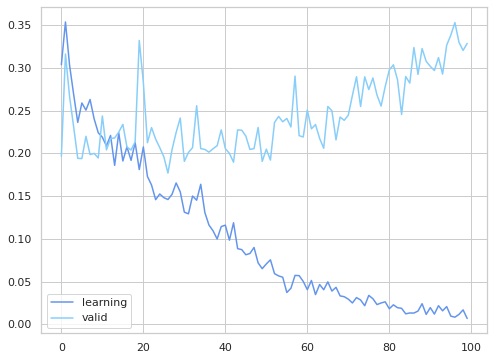

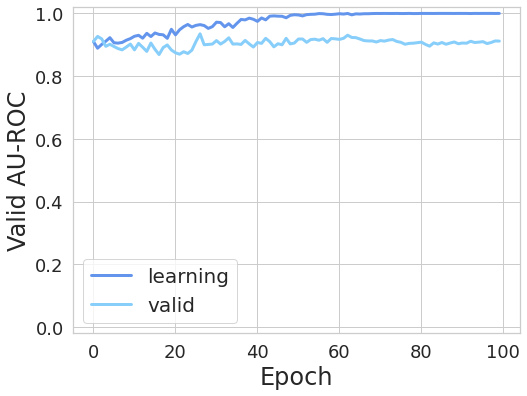

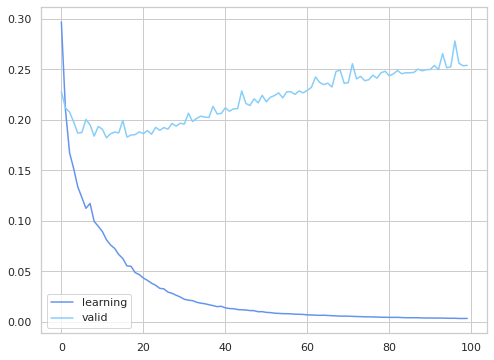

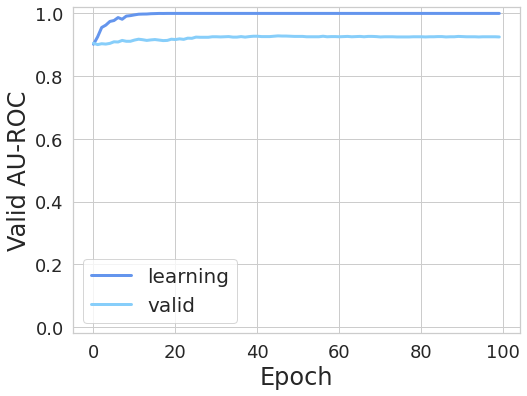

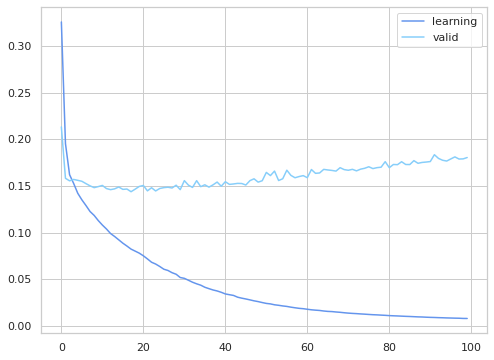

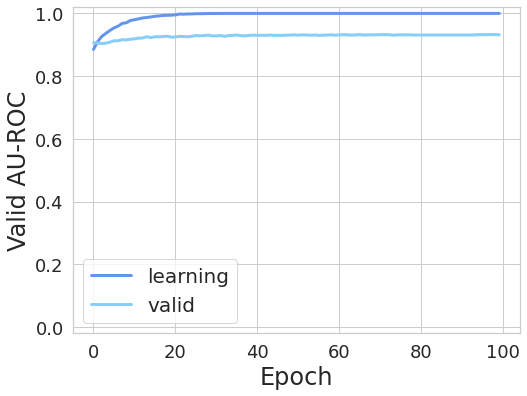

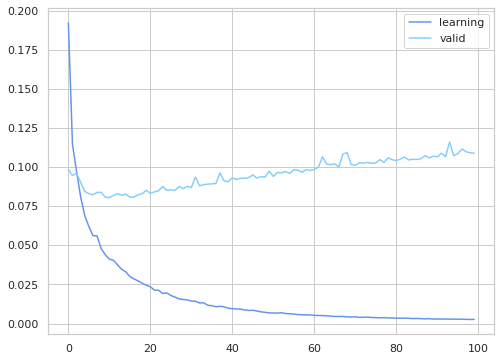

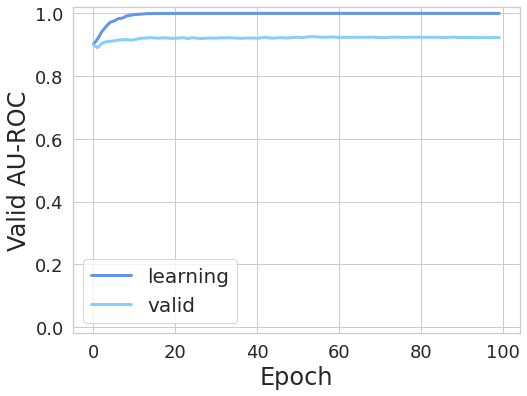

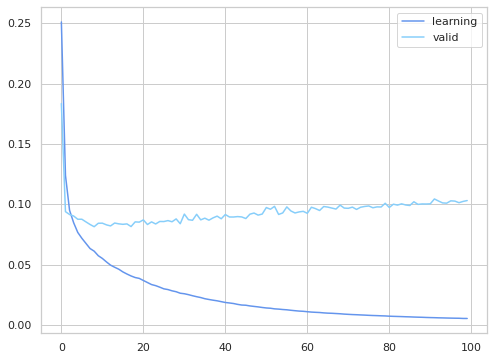

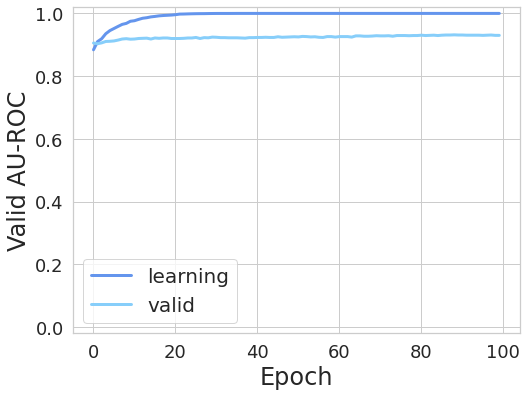

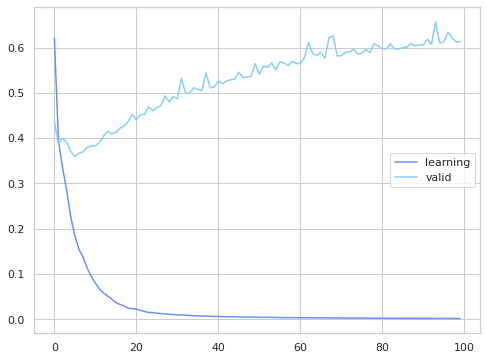

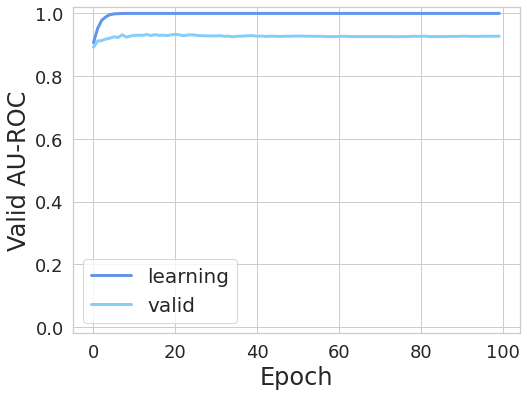

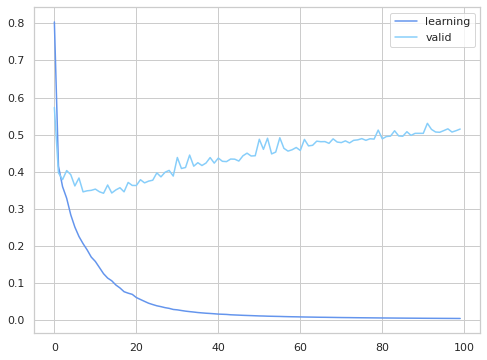

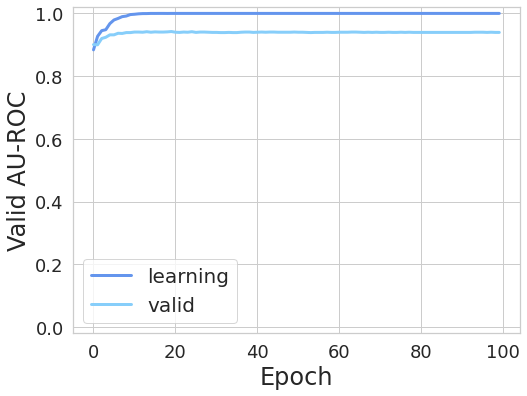

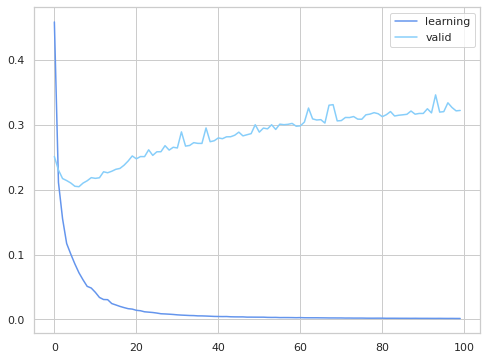

Error in callback <function flush_figures at 0x7f7fc3dbe310> (for post_execute):


KeyboardInterrupt: 

In [12]:
import os
from glob import glob

all_directories = glob('*')
all_directories = sorted(all_directories)

start_datetime = '2407040328'
start_index = 0

end_datetime = '2407041243'
end_index = 0

task_type = 'ViT_ViT_bn_N2'

for i,file in enumerate(all_directories):
    if file == start_datetime:
        start_index = i
    elif file == end_datetime:
        end_index = i

target_directories = all_directories[start_index:end_index+1]

for target_directory in target_directories:
    fig,ax = plt.subplots(figsize=(8,6))
    target_path = os.path.join(cd,target_directory,'log.csv')
    print(target_path)
    df = pd.read_csv(target_path)
    print(df)
    sampler = df['sampler'][0]
    print(sampler)
    lr = df['lr'][0]
    beta = df['beta'][0]
    gamma = df['gamma'][0]
    model_name = df['model_name'][0]
    EPOCH = int(len(df) / 10)
    print(EPOCH)
    
    learning_loss_list,_ = make_learning_loss_list(lr,df)
    valid_loss_list,_ = make_valid_loss_list(lr,df)
    
    epochs = list(range(EPOCH))
    
    plt.plot(epochs,learning_loss_list,label='learning',color='cornflowerblue')
    plt.plot(epochs,valid_loss_list,label='valid',color='lightskyblue')
    plt.legend()
    
    fig.savefig('./images/' + task_type + '_' + str(sampler) +'_' + str(lr) + '_beta' + str(beta) + '_gamma' + str(gamma) + 'loss.jpg')
    learning_prauc_list,_ = make_learning_prauc_list(lr,df)
    valid_prauc_list,_ = make_valid_prauc_list(lr,df,EPOCH)
    
    fig,ax = plt.subplots(figsize=(8,6))
    
    plt.plot(epochs,learning_prauc_list,label='learning',color='cornflowerblue',linewidth=3)
    plt.plot(epochs,valid_prauc_list,label='valid',color='lightskyblue',linewidth=3)
    plt.tick_params(axis='y', which='major', labelsize=18)
    plt.tick_params(axis='x', which='major', labelsize=18)
    plt.legend(fontsize=20)
    plt.xlabel("Epoch",fontsize=24)
    plt.ylabel("Valid AU-ROC",fontsize=24)
    plt.ylim(-0.02,1.02)
    plt.savefig('./images/' + task_type + '_' + str(sampler) +'_' + str(lr) + '_beta' + str(beta) + '_gamma' + str(gamma) + 'PRAUC.jpg')

In [13]:
import os
from glob import glob

all_directories = glob('*')
all_directories = sorted(all_directories)


#start_datetime = '231020-06:49'

start_datetime = '2407040328'
start_index = 0

end_datetime = '2407041243'
end_index = 0

for i,file in enumerate(all_directories):
    if file == start_datetime:
        start_index = i
    elif file == end_datetime:
        end_index = i
        
print(start_index) 
print(end_index)

target_directories = all_directories[start_index:end_index+1]
print(target_directories)

for target_directory in target_directories:
    target_path = os.path.join(cd,target_directory,'log.csv')
    df = pd.read_csv(target_path)

    sampler = df['sampler'][0]
    lr = df['lr'][0]
    beta = df['beta'][0]
    gamma = df['gamma'][0]
    model_name = df['model_name'][0]
    print(EPOCH)
    valid_prauc_list,validprauc_std_list = make_valid_prauc_list(lr,df,EPOCH)
    max_index = np.argmax(valid_prauc_list)

    BestPRAUC = str("{0:.3f}".format(max(valid_prauc_list))) + '±' + str("{0:.3f}".format(validprauc_std_list[max_index]))
    print(BestPRAUC)
    Best_Epoch = max_index
    GPUNo = '3'

    print("{0} {1} {2} {3} {4} {5} {6} {7}".format(sampler,gamma,beta,lr,BestPRAUC,Best_Epoch,GPUNo,target_directory))
    if sampler == 'over':
        write_results(result_over_path,[sampler,gamma,beta,lr,BestPRAUC,Best_Epoch,GPUNo,target_directory])
    elif sampler == 'under':
        write_results(result_under_path,[sampler,gamma,beta,lr,BestPRAUC,Best_Epoch,GPUNo,target_directory])
    elif sampler == 'normal':
        write_results(result_path,[sampler,gamma,beta,lr,BestPRAUC,Best_Epoch,GPUNo,target_directory])


102
124
['2407040328', '2407040346', '2407040416', '2407040437', '2407040506', '2407040528', '2407040557', '2407040618', '2407040648', '2407040709', '2407040739', '2407040800', '2407040829', '2407040851', '2407040920', '2407040941', '2407041011', '2407041032', '2407041102', '2407041123', '2407041152', '2407041214', '2407041243']
100
[0.55277778 1.         1.         1.         1.        ]
[0.63333333 1.         1.         1.         1.        ]
[0.59444444 1.         1.         1.         1.        ]
[0.475 1.    1.    1.    1.   ]
[0.50833333 1.         1.         1.         1.        ]
[0.47222222 1.         1.         1.         1.        ]
[0.43888889 1.         1.         1.         1.        ]
[0.41944444 1.         1.         1.         1.        ]
[0.46388889 1.         1.         1.         1.        ]
[0.51111111 1.         1.         1.         1.        ]
[0.41944444 1.         1.         1.         1.        ]
[0.52222222 1.         1.         1.         1.        ]
[0.461

[0.64722222 1.         1.         1.         1.        ]
[0.65277778 1.         1.         1.         1.        ]
[0.64166667 1.         1.         1.         1.        ]
[0.64166667 1.         1.         1.         1.        ]
[0.64722222 1.         1.         1.         1.        ]
[0.63333333 1.         1.         1.         1.        ]
[0.64722222 1.         1.         1.         1.        ]
[0.65 1.   1.   1.   1.  ]
[0.65555556 1.         1.         1.         1.        ]
[0.64444444 1.         1.         1.         1.        ]
[0.64166667 1.         1.         1.         1.        ]
[0.65 1.   1.   1.   1.  ]
[0.65277778 1.         1.         1.         1.        ]
[0.65 1.   1.   1.   1.  ]
[0.65277778 1.         1.         1.         1.        ]
[0.65 1.   1.   1.   1.  ]
[0.65555556 1.         1.         1.         1.        ]
[0.65 1.   1.   1.   1.  ]
[0.65 1.   1.   1.   1.  ]
[0.65 1.   1.   1.   1.  ]
[0.65277778 1.         1.         1.         1.        ]
[0.65555556 1

[0.63055556 1.         1.         1.         1.        ]
[0.63055556 1.         1.         1.         1.        ]
[0.62222222 1.         1.         1.         1.        ]
[0.64166667 1.         1.         1.         1.        ]
[0.64166667 1.         1.         1.         1.        ]
[0.63611111 1.         1.         1.         1.        ]
[0.63611111 1.         1.         1.         1.        ]
[0.63888889 1.         1.         1.         1.        ]
[0.64444444 1.         1.         1.         1.        ]
[0.64166667 1.         1.         1.         1.        ]
[0.64166667 1.         1.         1.         1.        ]
[0.64444444 1.         1.         1.         1.        ]
[0.63611111 1.         1.         1.         1.        ]
[0.64722222 1.         1.         1.         1.        ]
[0.64722222 1.         1.         1.         1.        ]
[0.64722222 1.         1.         1.         1.        ]
[0.64444444 1.         1.         1.         1.        ]
[0.64722222 1.         1.      

[0.64166667 1.         1.         1.         1.        ]
[0.64722222 1.         1.         1.         1.        ]
[0.64166667 1.         1.         1.         1.        ]
[0.63888889 1.         1.         1.         1.        ]
[0.63888889 1.         1.         1.         1.        ]
[0.63611111 1.         1.         1.         1.        ]
[0.63333333 1.         1.         1.         1.        ]
[0.63333333 1.         1.         1.         1.        ]
[0.63611111 1.         1.         1.         1.        ]
[0.64444444 1.         1.         1.         1.        ]
[0.64722222 1.         1.         1.         1.        ]
[0.64444444 1.         1.         1.         1.        ]
[0.64722222 1.         1.         1.         1.        ]
[0.64722222 1.         1.         1.         1.        ]
[0.64166667 1.         1.         1.         1.        ]
[0.64444444 1.         1.         1.         1.        ]
[0.64444444 1.         1.         1.         1.        ]
[0.65833333 1.         1.      

[0.67777778 1.         1.         1.         1.        ]
[0.67777778 1.         1.         1.         1.        ]
[0.67777778 1.         1.         1.         1.        ]
[0.67777778 1.         1.         1.         1.        ]
[0.67777778 1.         1.         1.         1.        ]
[0.68055556 1.         1.         1.         1.        ]
[0.67777778 1.         1.         1.         1.        ]
[0.68333333 1.         1.         1.         1.        ]
[0.68333333 1.         1.         1.         1.        ]
[0.68333333 1.         1.         1.         1.        ]
[0.68333333 1.         1.         1.         1.        ]
[0.68055556 1.         1.         1.         1.        ]
[0.675 1.    1.    1.    1.   ]
[0.675 1.    1.    1.    1.   ]
[0.67777778 1.         1.         1.         1.        ]
[0.67777778 1.         1.         1.         1.        ]
[0.68333333 1.         1.         1.         1.        ]
[0.675 1.    1.    1.    1.   ]
[0.675 1.    1.    1.    1.   ]
[0.67777778 1.   

[0.64166667 1.         1.         1.         1.        ]
[0.63888889 1.         1.         1.         1.        ]
[0.64444444 1.         1.         1.         1.        ]
[0.64722222 1.         1.         1.         1.        ]
[0.64444444 1.         1.         1.         1.        ]
[0.64166667 1.         1.         1.         1.        ]
[0.64444444 1.         1.         1.         1.        ]
[0.64166667 1.         1.         1.         1.        ]
[0.64722222 1.         1.         1.         1.        ]
[0.64444444 1.         1.         1.         1.        ]
[0.64166667 1.         1.         1.         1.        ]
[0.64166667 1.         1.         1.         1.        ]
[0.63055556 1.         1.         1.         1.        ]
[0.63611111 1.         1.         1.         1.        ]
[0.63888889 1.         1.         1.         1.        ]
[0.63611111 1.         1.         1.         1.        ]
[0.63333333 1.         1.         1.         1.        ]
[0.63888889 1.         1.      

[0.60833333 1.         1.         1.         1.        ]
[0.59444444 1.         1.         1.         1.        ]
[0.61388889 1.         1.         1.         1.        ]
[0.63055556 1.         1.         1.         1.        ]
[0.62222222 1.         1.         1.         1.        ]
[0.61944444 1.         1.         1.         1.        ]
[0.61944444 1.         1.         1.         1.        ]
[0.625 1.    1.    1.    1.   ]
[0.63611111 1.         1.         1.         1.        ]
[0.625 1.    1.    1.    1.   ]
[0.62777778 1.         1.         1.         1.        ]
[0.63055556 1.         1.         1.         1.        ]
[0.63611111 1.         1.         1.         1.        ]
[0.64166667 1.         1.         1.         1.        ]
[0.63888889 1.         1.         1.         1.        ]
[0.63611111 1.         1.         1.         1.        ]
[0.64166667 1.         1.         1.         1.        ]
[0.64444444 1.         1.         1.         1.        ]
[0.65 1.   1.   1.   1. 

[0.69166667 0.98263889 1.         1.         1.        ]
[0.69166667 0.98263889 1.         1.         1.        ]
[0.69166667 0.98263889 1.         1.         1.        ]
[0.69444444 0.98263889 1.         1.         1.        ]
[0.69444444 0.98263889 1.         1.         1.        ]
[0.69166667 0.98263889 1.         1.         1.        ]
[0.69166667 0.98263889 1.         1.         1.        ]
[0.68611111 0.98263889 1.         1.         1.        ]
[0.68611111 0.98263889 1.         1.         1.        ]
[0.68888889 0.98263889 1.         1.         1.        ]
[0.68333333 0.98263889 1.         1.         1.        ]
[0.68888889 0.98263889 1.         1.         1.        ]
[0.68888889 0.98263889 1.         1.         1.        ]
[0.68888889 0.98263889 1.         1.         1.        ]
[0.68611111 0.98263889 1.         1.         1.        ]
[0.68055556 0.98263889 1.         1.         1.        ]
[0.68055556 0.98263889 1.         1.         1.        ]
[0.68333333 0.98263889 1.      

[0.73611111 1.         1.         1.         1.        ]
[0.73611111 1.         1.         1.         1.        ]
[0.73333333 1.         1.         1.         1.        ]
0.949±0.102
over 1.0 0.0 3e-05 0.949±0.102 19 3 2407041123
100
[0.50555556 1.         1.         1.         1.        ]
[0.7 1.  1.  1.  1. ]
[0.64444444 1.         1.         1.         1.        ]
[0.62777778 1.         1.         1.         1.        ]
[0.67777778 1.         1.         1.         1.        ]
[0.62222222 1.         1.         1.         1.        ]
[0.66111111 1.         1.         1.         1.        ]
[0.66944444 1.         1.         1.         1.        ]
[0.67222222 1.         1.         1.         1.        ]
[0.66944444 1.         1.         1.         1.        ]
[0.66666667 1.         1.         1.         1.        ]
[0.66111111 1.         1.         1.         1.        ]
[0.65277778 1.         1.         1.         1.        ]
[0.65555556 1.         1.         1.         1.        ]
[0.

[0.63888889 1.         1.         1.         1.        ]
[0.63611111 1.         1.         1.         1.        ]
[0.63611111 1.         1.         1.         1.        ]
[0.63611111 1.         1.         1.         1.        ]
[0.63611111 1.         1.         1.         1.        ]
[0.63611111 1.         1.         1.         1.        ]
[0.63611111 1.         1.         1.         1.        ]
[0.63888889 1.         1.         1.         1.        ]
[0.63888889 1.         1.         1.         1.        ]
[0.63611111 1.         1.         1.         1.        ]
[0.63888889 1.         1.         1.         1.        ]
[0.63888889 1.         1.         1.         1.        ]
[0.63888889 1.         1.         1.         1.        ]
[0.63888889 1.         1.         1.         1.        ]
[0.63888889 1.         1.         1.         1.        ]
[0.63888889 1.         1.         1.         1.        ]
[0.63888889 1.         1.         1.         1.        ]
[0.63888889 1.         1.      

In [9]:
df

,model_name,lr,seed,sampler,beta,gamma,phase,epoch,loss,roc-auc,pr-auc,f1,TN,FN,FP,TP
0,ViT_21k,0.00003,0,normal,-1.0,0.0,learning,1,3.269225,0.419009,0.212417,0.135135,95,27,37,5
1,ViT_21k,0.00003,0,normal,-1.0,0.0,valid,1,2.273636,0.613889,0.324896,0.500000,9,21,1,11
2,ViT_21k,0.00003,0,normal,-1.0,0.0,learning,2,1.847196,0.604801,0.328826,0.309859,104,18,31,11
3,ViT_21k,0.00003,0,normal,-1.0,0.0,valid,2,1.861041,0.572222,0.309401,0.117647,26,4,11,1
4,ViT_21k,0.00003,0,normal,-1.0,0.0,learning,3,1.382152,0.768735,0.589448,0.428571,109,13,27,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ViT_21k,0.00003,0,normal,-1.0,0.0,valid,98,0.000084,1.000000,1.000000,1.000000,32,0,0,9
996,ViT_21k,0.00003,0,normal,-1.0,0.0,learning,99,0.000085,1.000000,1.000000,1.000000,120,0,0,45
997,ViT_21k,0.00003,0,normal,-1.0,0.0,valid,99,0.000084,1.000000,1.000000,1.000000,32,0,0,9
998,ViT_21k,0.00003,0,normal,-1.0,0.0,learning,100,0.000085,1.000000,1.000000,1.000000,120,0,0,45


In [14]:
import pickle
import os
import sys
import time
import random
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import seaborn as sns
import numpy as np
from torch.utils.data.dataset import Subset
from torch.utils.data import DataLoader
from sklearn.model_selection import KFold
from utils  import *
from network import *
from Dataset import *
from tqdm import tqdm
from sklearn.metrics import *
from datetime import datetime
from PIL import Image
from torchvision.utils import make_grid, save_image
import matplotlib
import japanize_matplotlib
import csv
import copy
from timm.models.layers import trunc_normal_
from util.pos_embed import interpolate_pos_embed
from lion_pytorch import Lion

notright = 0
acc_l = []
labels = pickle.load(open('../labels.pkl','rb'))
preds = pickle.load(open('../preds.pkl','rb'))

for threshold_a in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    for threshold_b in [1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]:
        preds[preds<threshold_a] = 0
        preds[(preds>=threshold_a) & (preds<=threshold_b)] = 1
        preds[preds>threshold_b] = 2

        #混同行列を作り、ヒートマップで可視化。
        fig_path = 'ResNet18' + '_ep_CM.png'
        save_fig_path = os.path.join('log','images',fig_path)

        cm = confusion_matrix(labels,preds)
        make_ConfusionMatrix(cm,save_fig_path)

        r_cnt,tmp,cnt = 0,0,0

        right = 0
        accuracy = 0

        right += (preds == labels).sum()
        notright += len(preds) - (preds == labels).sum()
        accuracy = right / 202
        acc_l.append(copy.deepcopy(accuracy))
        recall = recall_score(labels,preds,average='macro')
        precision = precision_score(labels,preds,average='macro')
        f1 = f1_score(labels,preds,average='macro')
        #f1 = macro_f1(labels,preds,config.n_class)
        #make_F1Bar(labels,preds,save_fig_path3,config.n_class)
        kappa = cohen_kappa_score(labels,preds,weights='quadratic')

        print('accuracy (macro) :',accuracy)
        print(acc_l)
        print('F1 Score (macro)', f1)
        print('Precision (macro) ',precision)
        print('Recall (macro) ',recall)
        print('Kappa',kappa)

ModuleNotFoundError: No module named 'utils'

 �h���C�u C �̃{�����[�� ���x���� Windows �ł�
 �{�����[�� �V���A���ԍ��� A87F-B9F8 �ł�

 c:\Users\syunt\MAE_Cataract16to1\log �̃f�B���N�g��

2024/03/18  13:38    <DIR>          .
2024/03/18  14:10    <DIR>          ..
2024/03/06  16:10    <DIR>          2403061610
2024/03/06  16:11    <DIR>          2403061611
2024/03/06  16:30    <DIR>          2403061630
2024/03/06  16:31    <DIR>          2403061631
2024/03/06  16:32    <DIR>          2403061632
2024/03/06  16:33    <DIR>          2403061633
2024/03/06  16:34    <DIR>          2403061634
2024/03/06  16:35    <DIR>          2403061635
2024/03/06  16:36    <DIR>          2403061636
2024/03/06  16:40    <DIR>          2403061640
2024/03/06  16:43    <DIR>          2403061643
2024/03/06  16:44    <DIR>          2403061644
2024/03/06  17:25    <DIR>          2403061725
2024/03/06  17:28    <DIR>          2403061728
2024/03/06  17:31    <DIR>          2403061731
2024/03/06  17:35    <DIR>          2403061735
2024/03/06  17:55    <DIR>      

In [73]:
result_over_df = pd.read_csv(result_over_path)
result_over_df = result_over_df.sort_values(by='β',ascending='False')
result_over_df.to_csv(result_over_path,index=False,encoding='shift-jis')

In [75]:
result_under_df = pd.read_csv(result_under_path)
result_under_df = result_under_df.sort_values(by='β',ascending='False')
result_under_df.to_csv(result_under_path,index=False,encoding='shift-jis')

In [47]:
result_df = pd.read_csv(result_path)

In [60]:
#この並び順に逆に統一

result_df = result_df.sort_values(by='β',ascending='False')
result_df.to_csv(result_path,index=False,encoding="shift-jis")